<a href="https://colab.research.google.com/github/evgeny-kolonsky/summer_seminar/blob/main/Global_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global optimization

v.0.1.1

Docs: https://lmfit.github.io/lmfit-py/

In [1]:
# global optimization module
!pip install lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.9 MB/s eta 0:00:00


In [2]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt

# Beats experiment

$$
x(t) = A \sin(\omega_0 t + \phi) + B \sin(\omega_{driver} t + \psi)
$$

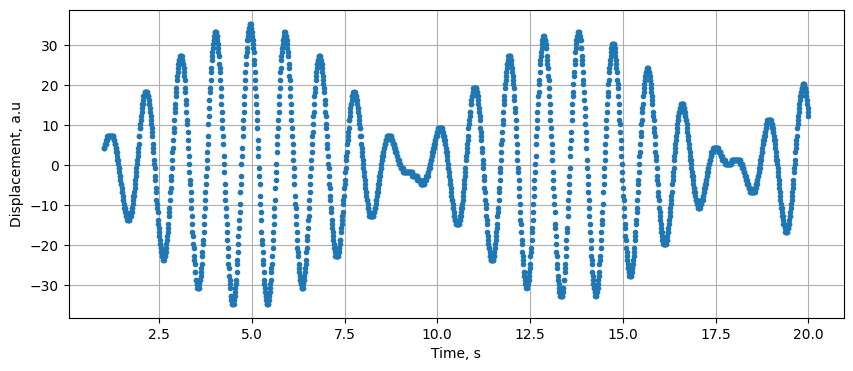

In [19]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO//beats/beats_over.txt'

t, xa, xb = np.genfromtxt(url, skip_header=1, usecols=[1,2, 3], delimiter='\t').T

xb -= np.mean(xb)
mask = t > 1
t = t[mask]
x = xb[mask]

# displacement is measured in counts with uncertainty equal to one count
uncertainty = 1

# display data
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(t, x, '.')
plt.xlabel('Time, s')
plt.ylabel('Displacement, a.u')
plt.grid()

omega1 = 7.10
omega2 = 6.38
Reduced Chi-square = 0.68


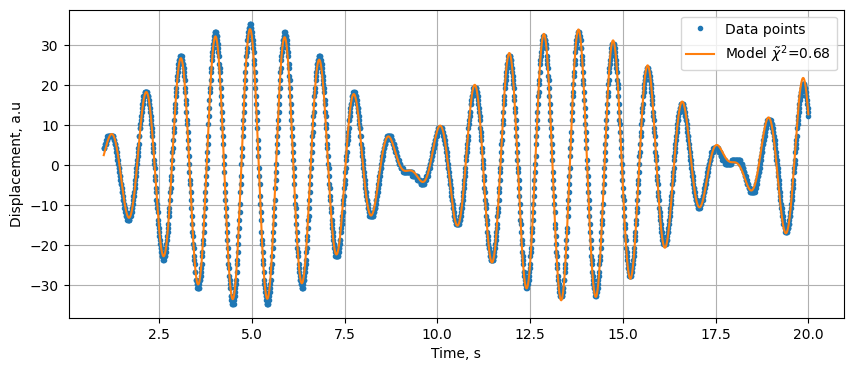

In [42]:
def model(params, t):
    amp1 = params['amp1']
    phase1 = params['phase1']
    omega1 = params['omega1']
    amp2 = params['amp2']
    phase2 = params['phase2']
    omega2 = params['omega2']
    return amp1  * np.sin(t*omega1 + phase1) + amp2  * np.sin(t*omega2 + phase2)

def residual(params, t, data, uncertainty):
    return (model(params, t) - data) / uncertainty

params = Parameters()
params.add('amp1', value=1, min=0, max=20)
params.add('phase1', value=0.0, min=-np.pi, max=np.pi)
params.add('omega1', value=1, min=1, max=10)
params.add('amp2', value=2,  min=0, max=20)
params.add('phase2', value=0.0, min=-np.pi, max=np.pi)
params.add('omega2', value=1, min=1, max=10)

out = minimize(residual, params, args=(t, x, uncertainty), method='dual_annealing')
x_expected = model(out.params, t)

omega1 = out.params['omega1'].value
omega2 = out.params['omega2'].value
chi2_reduced = out.redchi
print(f'omega1 = {omega1:.2f}')
print(f'omega2 = {omega2:.2f}')
print(f'Reduced Chi-square = {chi2_reduced:.2f}')

fig, ax = plt.subplots(figsize=(10,4))
plt.plot(t, x, '.', label='Data points')
plt.plot(t, x_expected, label=fr'Model $\tilde\chi^2$={chi2_reduced:.2f}')
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Displacement, a.u')
plt.grid()

In [39]:
out.params.pretty_print()

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp1       16.05        0       20     None     True     None     None
amp2       17.93        0       20     None     True     None     None
omega1     7.105        1       10     None     True     None     None
omega2     6.381        1       10     None     True     None     None
phase1    -2.191   -3.142    3.142     None     True     None     None
phase2     1.378   -3.142    3.142     None     True     None     None


In [40]:
out